In [29]:
import pandas as pd
import numpy as np
import json


%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)


matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False


# pandas max row 
pd.options.display.max_rows = 1000


## 매매 거래가

In [35]:
apt_tra = pd.read_csv('data/3.세종시_아파트(매매)_실거래가.csv', parse_dates = ['계약년월','계약일', '건축년도'])
mulit_tra = pd.read_csv('data/4.세종시_연립다세대(매매)_실거래가.csv')
single_tra = pd.read_csv('data/5.세종시_단독다가구(매매)_실거래가.csv')
offi_tra = pd.read_csv('data/6.세종시_오피스텔(매매)_실거래가.csv')


## 전월세

In [31]:
apt_lea = pd.read_csv('data/7.세종시_아파트(전월세)_실거래가.csv')
multi_lea = pd.read_csv('data/8.세종시_연립다세대(전월세)_실거래가.csv')
single_lea = pd.read_csv('data/9.세종시_단독다가구(전월세)_실거래가.csv')
offi_lea = pd.read_csv('data/10.세종시_오피스텔(전월세)_실거래가.csv')
biz_lea = pd.read_csv('data/11.세종시_상업업무용(매매)_실거래가.csv')
land_lea = pd.read_csv('data/12.세종시_토지(매매)_실거래가.csv')

### 아파트 매매

In [36]:
apt_tra.head(3)

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,19,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,"23,000",11,2015-01-01,NaN
1,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015-01-01,NaN
2,201701,14,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,"32,500",21,2015-01-01,NaN


In [33]:
apt_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   계약년월      18409 non-null  object        
 1   계약일       18409 non-null  object        
 2   시군구       18409 non-null  object        
 3   본번        18409 non-null  object        
 4   부번        18409 non-null  int64         
 5   단지명       18409 non-null  object        
 6   전용면적(㎡)   18409 non-null  float64       
 7   거래금액(만원)  18409 non-null  object        
 8   층         18409 non-null  int64         
 9   건축년도      18409 non-null  datetime64[ns]
 10  해제사유발생일   490 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 1.5+ MB


In [43]:
apt_tra['거래금액(만원)'] = apt_tra['거래금액(만원)'].str.replace(',','').astype('int64')

apt_tra['계약년월일'] = pd.to_datetime(apt_tra['계약년월'] + apt_tra['계약일'], format='%Y%m%d')

apt_tra = apt_tra.drop(columns=['계약일'])


apt_tra['건축년도'] = apt_tra['건축년도'].dt.to_period('Y')



In [7]:
apt_tra.describe()

,부번,전용면적(㎡),거래금액(만원),층,해제사유발생일
count,18409.000000,18409.000000,18409.000000,18409.000000,4.900000e+02
mean,0.313108,78.722841,35590.326036,9.942582,2.020092e+07
std,2.530939,22.876345,20398.821137,6.545001,1.204988e+03
min,0.000000,12.179900,1800.000000,1.000000,2.020030e+07
25%,0.000000,59.970000,23000.000000,5.000000,2.020071e+07
50%,0.000000,84.840000,33000.000000,9.000000,2.020080e+07
75%,0.000000,84.990000,45000.000000,14.000000,2.020083e+07
max,173.000000,176.343000,157000.000000,33.000000,2.021021e+07


In [44]:
apt_tra.head(3)

,계약년월,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,계약년월일
0,201701,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,23000,11,2015,NaN,2017-01-19
1,201701,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000,3,2015,NaN,2017-01-02
2,201701,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,32500,21,2015,NaN,2017-01-14


<AxesSubplot:ylabel='Frequency'>

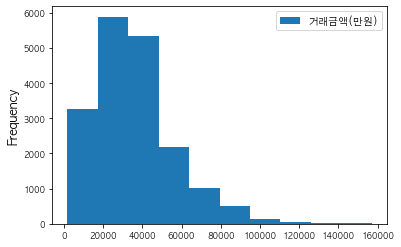

In [9]:
apt_tra.plot.hist(y='거래금액(만원)')

<AxesSubplot:xlabel='층', ylabel='거래금액(만원)'>

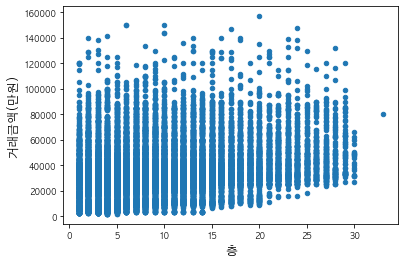

In [10]:
apt_tra.plot.scatter(x='층', y='거래금액(만원)')

In [12]:
apt_tra.groupby('건축년도').describe()['거래금액(만원)']

,count,mean,std,min,25%,50%,75%,max
건축년도,,,,,,,,
1980,2.0,4750.000000,1343.502884,3800.0,4275.0,4750.0,5225.0,5700.0
1988,8.0,5687.500000,810.973841,4000.0,5562.5,5950.0,6162.5,6500.0
1989,253.0,7095.454545,2239.938768,4000.0,5600.0,6270.0,7900.0,14200.0
1990,1.0,5000.000000,NaN,5000.0,5000.0,5000.0,5000.0,5000.0
1991,230.0,6713.413043,1987.145861,3200.0,5162.5,6400.0,7687.5,14500.0
1992,82.0,10200.243902,2714.220428,4200.0,7500.0,10750.0,12450.0,15000.0
1994,110.0,8323.636364,2246.104774,4900.0,6525.0,7800.0,9750.0,15300.0
1996,561.0,12482.436720,4001.024007,2880.0,10950.0,12500.0,14900.0,35000.0
1997,35.0,8310.000000,1111.226138,6000.0,7700.0,8200.0,9050.0,11300.0


<AxesSubplot:xlabel='건축년도'>

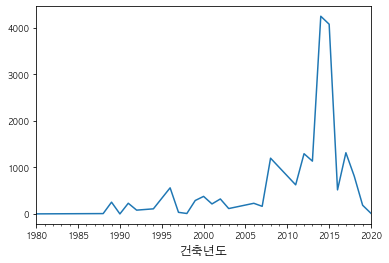

In [14]:
apt_tra.groupby('건축년도').count()['거래금액(만원)'].plot()

<AxesSubplot:xlabel='계약년월'>

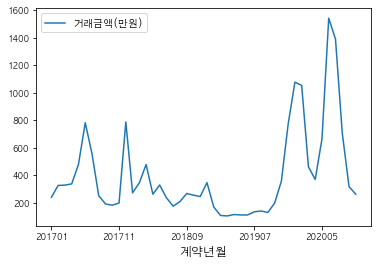

In [48]:
apt_tra.groupby('계약년월').count()[['거래금액(만원)']].plot()

In [50]:
apt_tra.groupby('계약년월').count()[['거래금액(만원)']]

,거래금액(만원)
계약년월,
201701,241
201702,327
201703,329
201704,338
201705,480
201706,783
201707,557
201708,251
201709,192


In [58]:
apt_tra.groupby('계약년월').count()[['거래금액(만원)']].sort_values(by=['거래금액(만원)'], ascending=False)[:10]

,거래금액(만원)
계약년월,
202006,1543
202007,1391
202001,1078
202002,1054
201712,789
201706,783
201912,772
202008,709
202005,665


In [59]:
apt_tra.corr()

,부번,전용면적(㎡),거래금액(만원),층,해제사유발생일
부번,1.000000,-0.117580,-0.099560,-0.048149,0.046597
전용면적(㎡),-0.117580,1.000000,0.483079,0.162927,0.011771
거래금액(만원),-0.099560,0.483079,1.000000,0.235347,0.165393
층,-0.048149,0.162927,0.235347,1.000000,0.048761
해제사유발생일,0.046597,0.011771,0.165393,0.048761,1.000000


In [67]:
apt_tra.groupby('건축년도').corr()

부번   전용면적(㎡)  거래금액(만원)         층   해제사유발생일
건축년도                                                           
1980 부번             NaN       NaN       NaN       NaN       NaN
     전용면적(㎡)        NaN       NaN       NaN       NaN       NaN
     거래금액(만원)       NaN       NaN  1.000000 -1.000000       NaN
     층              NaN       NaN -1.000000  1.000000       NaN
     해제사유발생일        NaN       NaN       NaN       NaN       NaN
1988 부번             NaN       NaN       NaN       NaN       NaN
     전용면적(㎡)        NaN  1.000000  0.000000  0.000000       NaN
     거래금액(만원)       NaN  0.000000  1.000000  0.291080       NaN
     층              NaN  0.000000  0.291080  1.000000       NaN
     해제사유발생일        NaN       NaN       NaN       NaN       NaN
1989 부번        1.000000 -0.868848 -0.491865 -0.372749       NaN
     전용면적(㎡)  -0.868848  1.000000  0.523664  0.322337 -0.009939
     거래금액(만원) -0.491865  0.523664  1.000000  0.120297  0.819708
     층        -0.372749  0.322337  0.120297  1.000000  0.133415
     해제사유발생일        NaN -0.009939  0.819708  0.133415  1.000000
1990 부번             NaN       NaN       NaN       NaN       NaN
     전용면적(㎡)        NaN       NaN       NaN       NaN       NaN
     거래금액(만원)       NaN       NaN       NaN       NaN       NaN
     층              NaN       NaN       NaN       NaN       NaN
     해제사유발생일        NaN       NaN       NaN       NaN       NaN
1991 부번        1.000000  0.116526 -0.137877 -0.158292       NaN
     전용면적(㎡)   0.116526  1.000000  0.824114  0.479348       NaN
     거래금액(만원) -0.137877  0.824114  1.000000  0.488837  0.994601
     층        -0.158292  0.479348  0.488837  1.000000  0.994601
     해제사유발생일        NaN       NaN  0.994601  0.994601  1.000000
1992 부번        1.000000 -0.683430 -0.682881  0.019841       NaN
     전용면적(㎡)  -0.683430  1.000000  0.892127  0.242657       NaN
     거래금액(만원) -0.682881  0.892127  1.000000  0.262153       NaN
     층         0.019841  0.242657  0.262153  1.000000       NaN
     해제사유발생일        NaN       NaN       NaN       NaN       NaN
1994 부번        1.000000 -0.139483  0.033193  0.266110       NaN
     전용면적(㎡)  -0.139483  1.000000  0.846645  0.282221       NaN
     거래금액(만원)  0.033193  0.846645  1.000000  0.413097       NaN
     층         0.266110  0.282221  0.413097  1.000000       NaN
     해제사유발생일        NaN       NaN       NaN       NaN       NaN
1996 부번        1.000000 -0.075368 -0.300411 -0.104323       NaN
     전용면적(㎡)  -0.075368  1.000000  0.740158  0.279503  0.256343
     거래금액(만원) -0.300411  0.740158  1.000000  0.370852  0.275014
     층        -0.104323  0.279503  0.370852  1.000000 -0.459176
     해제사유발생일        NaN  0.256343  0.275014 -0.459176  1.000000
1997 부번             NaN       NaN       NaN       NaN       NaN
     전용면적(㎡)        NaN  1.000000  0.540339  0.297732       NaN
     거래금액(만원)       NaN  0.540339  1.000000  0.256362 -1.000000
     층              NaN  0.297732  0.256362  1.000000 -1.000000
     해제사유발생일        NaN       NaN -1.000000 -1.000000  1.000000
1998 부번             NaN       NaN       NaN       NaN       NaN
     전용면적(㎡)        NaN  1.000000  0.526615  0.045941       NaN
     거래금액(만원)       NaN  0.526615  1.000000  0.182850       NaN
     층              NaN  0.045941  0.182850  1.000000       NaN
     해제사유발생일        NaN       NaN       NaN       NaN       NaN
1999 부번             NaN       NaN       NaN       NaN       NaN
     전용면적(㎡)        NaN  1.000000  0.675008  0.018858 -0.151371
     거래금액(만원)       NaN  0.675008  1.000000  0.063072  0.518759
     층              NaN  0.018858  0.063072  1.000000 -0.203979
     해제사유발생일        NaN -0.151371  0.518759 -0.203979  1.000000
2000 부번             NaN       NaN       NaN       NaN       NaN
     전용면적(㎡)        NaN  1.000000  0.774004  0.090701  0.253373
     거래금액(만원)       NaN  0.774004  1.000000  0.153433  0.455963
     층              NaN  0.090701  0.153433  1.000000  0.423852
     해제사유발생일        NaN  0.253373  0.455963  0.423852  1.000000
2001 부번             NaN       NaN       NaN       NaN

In [93]:
apt_tra.head()



,계약년월,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,계약년월일
0,2017-01-01,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,23000,11,2015,NaN,2017-01
1,2017-01-01,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000,3,2015,NaN,2017-01
2,2017-01-01,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,32500,21,2015,NaN,2017-01
3,2017-01-01,세종특별자치시 고운동,1386,0,가락마을17단지(골드클래스),59.9159,25100,7,2015,NaN,2017-01
4,2017-01-01,세종특별자치시 고운동,1390,0,가락마을21단지(에듀포레),99.9434,32250,3,2015,NaN,2017-01


<AxesSubplot:xlabel='계약년월'>

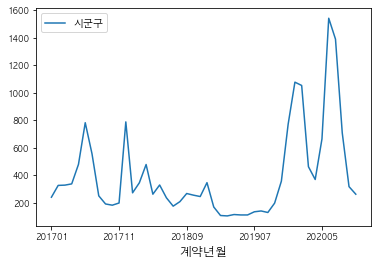

In [77]:
apt_tra.groupby('계약년월').count()[['시군구']].plot()